In [602]:
import pandas as pd

# Importando dados de abas específicas de arquivos excel
df_desenvolvimento = pd.read_excel("dados_idh.xlsx", sheet_name= "Desenvolvimento")

df_desenvolvimento.head(5)

,País,IDH,Anos de escolaridade (médio),PIB per Capita ($)
0,Afghanistan.,0.733,10.3,76654
1,Aland Islands,0.820,12.3,142759
2,Algeria,0.809,12.2,113165
3,American Samoa,0.859,13.1,136649
4,Andorra,0.704,10.6,66463


In [603]:
df_pais_continente = pd.read_excel("dados_idh.xlsx", sheet_name= "País - Continente")

df_pais_continente.head(5)

,País,Continente
0,Afghanistan,Europe
1,Aland Islands,Asia
2,Algeria,North America
3,American Samoa,Europe
4,Andorra,North America


### Tratamento dos Dados  

A etapa de tratamento dos dados é essencial para garantir a qualidade, consistência e integridade dos dados, permitindo análises precisas e tomadas de decisão informadas.

Neste caso, é necessário garantir que o nome dos países estejam iguais nos dataframes df_pais_continente e df_desenvolvimento a fim de conseguirmos cruzar a informação das duas tabelas. Para este processo de remoção de ruído de dados textuais, damos o nome de **normalização**

#### Etapas da Normalização

##### *1) Remoção de caixa alta*

In [604]:
teste = "TEXTO CAIXA ALTA"

print(teste) # antes de aplicar o lower

teste = teste.lower()

print(teste) # depois de aplicar o lower

df_desenvolvimento.head(5)

TEXTO CAIXA ALTA
texto caixa alta


,País,IDH,Anos de escolaridade (médio),PIB per Capita ($)
0,Afghanistan.,0.733,10.3,76654
1,Aland Islands,0.820,12.3,142759
2,Algeria,0.809,12.2,113165
3,American Samoa,0.859,13.1,136649
4,Andorra,0.704,10.6,66463


In [605]:
# Convertendo texto do nosso df para letras minúsculas

df_pais_continente['País'] = df_pais_continente['País'].str.lower()
df_desenvolvimento['País'] = df_desenvolvimento['País'].str.lower()

df_desenvolvimento.head()

,País,IDH,Anos de escolaridade (médio),PIB per Capita ($)
0,afghanistan.,0.733,10.3,76654
1,aland islands,0.820,12.3,142759
2,algeria,0.809,12.2,113165
3,american samoa,0.859,13.1,136649
4,andorra,0.704,10.6,66463


O método **.lower()** não funciona diretamente em DataFrames inteiros. Um DataFrame é uma estrutura mista (números, texto, datas), e o Pandas não sabe onde aplicar a função de string.

Para aplicar operações de string como .lower() a uma coluna específica, é preciso usar o acessor **.str**. Ele vectoriza a operação, aplicando-a de forma eficiente em cada linha de texto daquela coluna.

🔑 Lembrete: Para strings, use sempre df['coluna']**.str**.*função*().

##### *2) Remoção de pontos*

In [606]:
teste = 'ESSA . STRING . TEM . PONTOS'

teste.replace('.',' ')

'ESSA   STRING   TEM   PONTOS'

In [607]:
df_pais_continente['País'] = df_pais_continente['País'].str.replace('.',' ')
df_desenvolvimento['País'] = df_desenvolvimento['País'].str.replace('.',' ')

df_desenvolvimento.head()

,País,IDH,Anos de escolaridade (médio),PIB per Capita ($)
0,afghanistan,0.733,10.3,76654
1,aland islands,0.820,12.3,142759
2,algeria,0.809,12.2,113165
3,american samoa,0.859,13.1,136649
4,andorra,0.704,10.6,66463


##### *3) Remoção de espaço excessivos*
##### *a) Extremidades*

In [608]:
teste_sem_espacos = 'Isso é um teste'

teste_com_espacos = '  Isso é um teste  '

teste_sem_espacos == teste_com_espacos # Falso, pq o segundo exemplo tem espaços na extremidades

False

In [609]:
teste_arrumado = teste_com_espacos.strip()

teste_sem_espacos == teste_arrumado # True, strip() removeu os espaços na extremidades

True

##### *b) Espaço entre Palavras*

In [610]:
teste_sem_espacos = 'Isso é um teste'

teste_com_espacos = 'Isso       é        um        teste'

teste_sem_espacos == teste_com_espacos # Falso, pq há espaços entres as palavras

False

In [611]:
# Split corte o texto usando espaço como delimitador, e cria uma lista das palavras
teste_com_espacos.split() 

['Isso', 'é', 'um', 'teste']

In [612]:
# Join junta a lista com um delimitador especificado 
teste_arrumado = '*'.join(teste_com_espacos.split())
teste_arrumado 

'Isso*é*um*teste'

In [613]:
teste_arrumado = ' '.join(teste_com_espacos.split())

teste_arrumado

'Isso é um teste'

In [614]:
teste_sem_espacos == teste_arrumado 

True

##### *Criando uma função*
Para remover os dois tipos de espaços excessivos

In [615]:
def remove_espacos_excessivos(nome_original):
    # remove espaços nas extremidades
    nome_primeiro_ajuste = nome_original.strip()

    # remove espaços entre palavras
    nome_ajustado = ' '.join(nome_primeiro_ajuste.split())

    return nome_ajustado

In [616]:
teste_com_espacos = 'Isso       é        um        teste'

remove_espacos_excessivos(teste_com_espacos)

'Isso é um teste'

In [617]:
df_pais_continente['País'] = df_pais_continente['País'].apply(remove_espacos_excessivos)
df_desenvolvimento['País'] = df_desenvolvimento['País'].apply(remove_espacos_excessivos)

Agora que os nomes dos países foram normalizados, podemos proceder com cruzamento dos dados dos dataframes df_pais_continente e df_desenvolvimento

#### **Merge**
O comando *merge* do Pandas é o que junta tabelas em Python, funcionando de maneira muito similar ao JOIN do SQL.

O seu comando tem três parâmetros essenciais:

**1. O que Juntar (*right = ...*)** \
*right = df_pais_continente* \
Diz qual é o segundo DataFrame que você quer juntar ao primeiro (df_desenvolvimento). 
O primeiro DataFrame (o que chama o método .merge()) é sempre considerado o DataFrame da Esquerda (left).

**2. Por Qual Coluna Juntar (*on = ...*)** \
*on = 'País'* \
É a chave (a coluna em comum) usada para encontrar as correspondências. O Pandas Pandas vai linha por linha em df-left, procurando o valor da coluna 'País' em df-right.

**3. Como Juntar (O Tipo de União: *how = 'left'*)** \
Este é o parâmetro mais importante, pois define as regras para o resultado final, especialmente quando há dados ausentes em uma das tabelas.

| **How** | **Conceito** | **Resultado** |
| -------- | ----- | ----------- |
| left        | Tudo da Esquerda + Correspondências da Direita     | Mantém TODAS as linhas do df-left. Se não houver correspondência no df-right, a nova coluna receberá o valor NaN.     |
| inner        | Apenas a Interseção (O Comum)     |  Mantém SOMENTE as linhas que possuem correspondência em ambas as tabelas. Linhas sem par em qualquer uma das tabelas são descartadas.           |
| right | Tudo da Direita + Correspondências da Esquerda | Mantém TODAS as linhas do df-right. Se não houver correspondência no df-left, as colunas df-left receberão NaN. |
| outer | A União de Tudo | Mantém TODAS as linhas de AMBAS as tabelas. Preenche com NaN onde não houver correspondência |





In [618]:
df_completo = df_desenvolvimento.merge(right = df_pais_continente, on = 'País', how = 'left')
df_completo

,País,IDH,Anos de escolaridade (médio),PIB per Capita ($),Continente
0,afghanistan,0.733,10.3,76654,Europe
1,aland islands,0.820,12.3,142759,Asia
2,algeria,0.809,12.2,113165,North America
3,american samoa,0.859,13.1,136649,Europe
4,andorra,0.704,10.6,66463,North America
...,...,...,...,...,...
188,virgin islands,0.511,6.9,22119,South America
189,wallis and futuna,0.792,11.8,109309,Oceania
190,western sahara,0.672,9.5,62289,Africa
191,zambia,0.708,10.6,77274,Europe


**🔍 Checando Valores Nulos (NaN)** \
Para checar a presença de valores nulos (NaN) no seu DataFrame resultante, você deve usar o método .isnull() (ou .isna()) do Pandas, combinado com .sum().

*1. Contando Nulos por Coluna (Mais Comum)* \
Use o método .isnull() para testar se cada célula é nula, e em seguida .sum() para somar a quantidade de True (nulo) por coluna.

In [619]:
# Verificando se há valores nulos na coluna Continent
df_completo['Continente'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
188    False
189    False
190    False
191    False
192    False
Name: Continente, Length: 193, dtype: bool

In [620]:
# Contagem de valores nulos
df_completo['Continente'].isnull().sum()

np.int64(0)

*2. Trazer linhas com valores nulos* \
retorna apenas as linhas originais do df_completo onde o valor da coluna 'Continente' é nulo.

In [621]:
df_completo[df_completo['Continente'].isna()]

,País,IDH,Anos de escolaridade (médio),PIB per Capita ($),Continente


*3. Informações do DataFrame* \
mostra um resumo estrutural e estatístico rápido do seu DataFrame, e inclusive se há colunas com valores nulos

In [622]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   País                          193 non-null    object 
 1   IDH                           193 non-null    float64
 2   Anos de escolaridade (médio)  193 non-null    float64
 3   PIB per Capita ($)            193 non-null    int64  
 4   Continente                    193 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 7.7+ KB


### Solução

**Questão 1: Existe alguma relação entre IDH e PIB Per Capita?**

A biblioteca matplotlib é uma ferramenta essencial para a visualização de dados em Python, permitindo a criação de gráficos e plots de diversos tipos, facilitando a interpretação e comunicação dos resultados de análises.

Assim como fizemos com o pandas, também é necessário instalar a biblioteca via pip, conforme mostrado abaixo: \
*pip install matplotlib*

In [623]:
import matplotlib.pyplot as plt

Gerando gráficos a partir dos dados

**1. Preparando a "Tela"** \
Primeiro precisamos criar o espaço do novo gráfico e definir suas dimensões.

*plt.figure* \
É como pegar uma nova folha em branco (ou "figura") onde o gráfico será desenhado. 

*figsize=(10,5)* \
Especifica o tamanho dessa folha em polegadas. Neste caso, o gráfico terá 10 polegadas de largura por 5 polegadas de altura.

**2. Desenhando os Pontos (O Gráfico de Dispersão)** \
Vamos utilizar o gráfico de dispersão (scatter) para plotar todos os pares de dados (PIB vs IDH) como pontos no plano.

*plt.scatter()* \
Este é o comando para desenhar os pontos. Ele cria um Gráfico de Dispersão (Scatter Plot), ideal para ver a relação entre duas variáveis.

*1º Argumento (Eixo X)* \
df_completo['PIB per Capita ($)'] \
Define qual coluna do seu DataFrame (variável) será colocada no eixo horizontal (X).

*2º Argumento (Eixo Y)* \
df_completo['IDH'] \
Define qual coluna do seu DataFrame será colocada no eixo vertical (Y).

*color = 'r'* \
Define a cor dos pontos. 'r' é a abreviação para red (vermelho)

**3. Rotulando o Gráfico** \

*plt.title()* \
Adiciona o título principal na parte superior do seu gráfico.

*plt.xlabel()* \
Adiciona um rótulo ao eixo X, deixando claro o que os números representam.

*plt.ylabel()* \
Adiciona um rótulo ao eixo Y.

**4. Finalizando e Mostrando o Gráfico** \

*plt.show()* \
É o comando final que renderiza e exibe o gráfico. Tudo o que foi configurado antes (figure, scatter, title, etc.) só aparece quando este comando é executado.

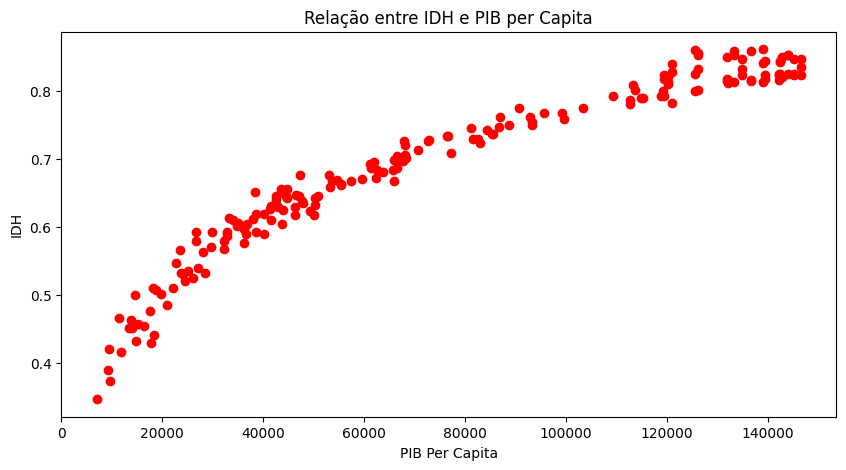

In [624]:
# 1. Criar uma figura com tamanho especificado
plt.figure(figsize=(10,5))

# 2. Gráfico de Dispersão - scatter
plt.scatter(
    df_completo['PIB per Capita ($)'], # eixo x
    df_completo['IDH'], # eixo y
    color = 'r' # cor vermelha
)

# 3. Adicionar títulos e rótulos do eixo
plt.title("Relação entre IDH e PIB per Capita")
plt.xlabel('PIB Per Capita')
plt.ylabel('IDH')

# 4. Exibir o gráfico
plt.show()

**Questão 2: Existe alguma relação entre IDH e anos médios de escolaridade?**

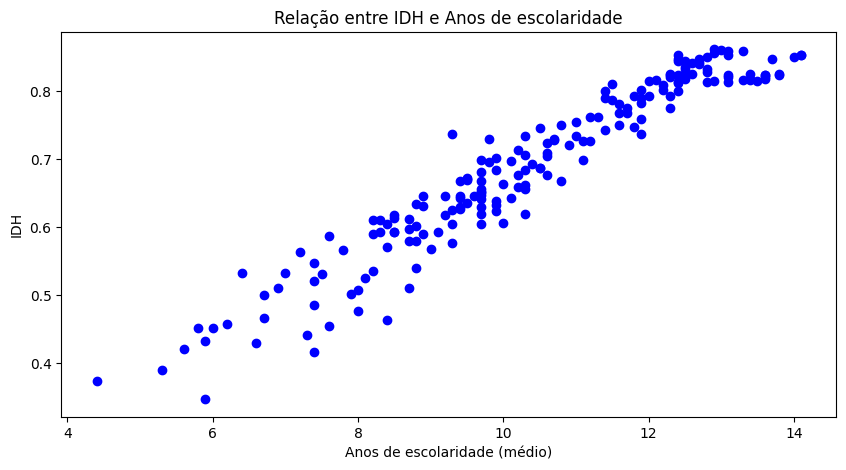

In [625]:
# 1. Criar uma figura com tamanho especificado
plt.figure(figsize=(10,5))

# 2. Gráfico de Dispersão - scatter
plt.scatter(
    df_completo['Anos de escolaridade (médio)'], # eixo x
    df_completo['IDH'], # eixo y
    color = 'b' # cor azul
)

# 3. Adicionar títulos e rótulos do eixo
plt.title("Relação entre IDH e Anos de escolaridade")
plt.xlabel('Anos de escolaridade (médio)')
plt.ylabel('IDH')

# 4. Exibir o gráfico
plt.show()

**Questão 3: Qual é a média do IDH para cada um dos continentes?**

Para conseguir responder essa questão, é necessário agrupar os IDHs por continente e, então, extrair a média desses valores.
Felizmente, o pandas possui um método que facilita o cálculo de estatísticas descritivas de agrupamentos dos dados. O nome desta função é *groupby*

In [626]:
# Calculando a média para cada continente

media_por_continente = df_completo.groupby(['Continente'])['IDH'].mean().to_frame().reset_index()

media_por_continente

,Continente,IDH
0,Africa,0.676815
1,Asia,0.695214
2,Europe,0.688659
3,North America,0.673667
4,Oceania,0.687042
5,South America,0.712194


| **Código** | **Objetivo** |
| -------- | ----- |
| `df_completo.groupby(['Continente'])` | Agrupa as linhas do DataFrame por cada valor único na coluna 'Continente'. |
| `['IDH'].mean()` | Seleciona a coluna 'IDH' e calcula a média dentro de cada grupo (Continente). |
| `.to_frame()` | Transforma a Série resultante em um DataFrame. |
| `.reset_index` | Converte o 'Continente' (que era o índice) de volta para uma coluna de dados regular. |

O `.to_frame()` e o `reset_index()` são usados principalmente para formatar o resultado da agregação (`groupby().mean()`) em um formato de tabela (DataFrame) que é mais fácil de ler e manipular.
Se você não utilizarmos esses comandos, o resultado será uma Série do Pandas, em vez de um DataFrame.

In [627]:
# Ordenando de forma decrescente

media_por_continente = media_por_continente.sort_values(by = 'IDH', ascending = False)
media_por_continente

,Continente,IDH
5,South America,0.712194
1,Asia,0.695214
2,Europe,0.688659
4,Oceania,0.687042
0,Africa,0.676815
3,North America,0.673667


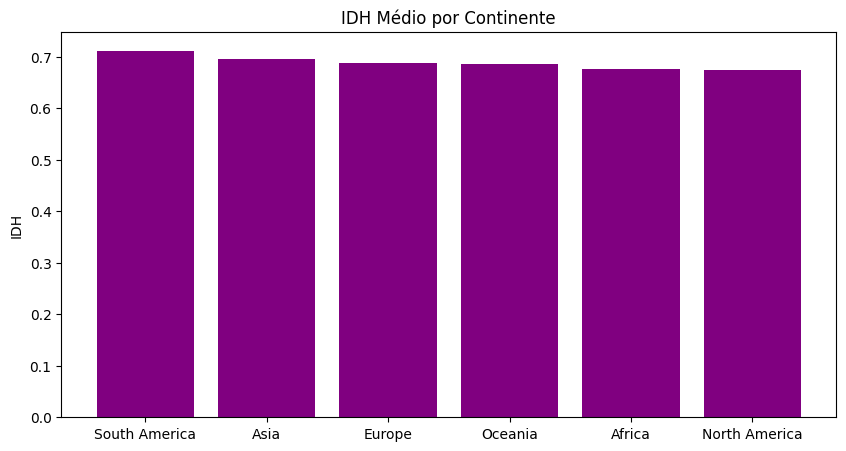

In [628]:
# Criar uma figura
plt.figure(figsize = (10,5))

# Gráfico de Barras com o IDH Médio por continente
plt.bar(
    media_por_continente['Continente'], # eixo x
    media_por_continente['IDH'], # eixo y
    color = 'purple'
)

# Adicionar título e rótulo de dados
plt.title('IDH Médio por Continente')
plt.ylabel('IDH')

plt.show()

**Questão 4: Quantos países de cada continente possuem IDH acima da média global?**

Para resolver esta questão, precisamos: \
    1. Contabilizar o número total de países \
    2. Identificar a média global \
    3. Contabilizar o número total de países acima da média global \
    4. Calcular o percentual dividindo os resultados de 3 e 4 \
    5. Plotar os gráficos

In [629]:
# 1. Calculando o número total de países

numero_total_paises = df_completo.groupby(['Continente'])['País'].count().to_frame().reset_index()
numero_total_paises

,Continente,País
0,Africa,27
1,Asia,28
2,Europe,44
3,North America,39
4,Oceania,24
5,South America,31


In [630]:
# 2. Calculando a média global

media_global = df_completo['IDH'].mean()

print(f' Média Global: {media_global}')

 Média Global: 0.6885025906735751


In [631]:
# 3. Calculando o número total de países acima da média global

paises_acima_media_global = df_completo[df_completo['IDH'] > media_global ] #Filtra o df para manter apenas os países com IDH acima da média global
paises_acima_media_global.head()

,País,IDH,Anos de escolaridade (médio),PIB per Capita ($),Continente
0,afghanistan,0.733,10.3,76654,Europe
1,aland islands,0.820,12.3,142759,Asia
2,algeria,0.809,12.2,113165,North America
3,american samoa,0.859,13.1,136649,Europe
4,andorra,0.704,10.6,66463,North America


In [632]:
# Contagem de países acima da média

numero_paises_acima_media = paises_acima_media_global.groupby(['Continente'])['País'].count().to_frame().reset_index()
numero_paises_acima_media

,Continente,País
0,Africa,12
1,Asia,15
2,Europe,24
3,North America,14
4,Oceania,13
5,South America,20


In [633]:
# 4. Calculando o percentual de países acima da média

numero_paises_acima_media['percentual_acima_media'] = (numero_paises_acima_media['País'] / numero_total_paises ['País'])*100
numero_paises_acima_media

''' Aqui é preciso tomar cuidado com a ordem de valores nos dois dataframe, para garantir que os valores divididos serão dos mesmos continentes,
uma alternativa seria ordenar previamente cada df por ordem alfabetica, ou então fazer um merge pelo Continente para garantir
'''

' Aqui é preciso tomar cuidado com a ordem de valores nos dois dataframe, para garantir que os valores divididos serão dos mesmos continentes,\numa alternativa seria ordenar previamente cada df por ordem alfabetica, ou então fazer um merge pelo Continente para garantir\n'

In [634]:
numero_paises_acima_media = numero_paises_acima_media.sort_values(by = 'percentual_acima_media', ascending = False) # ordenando descrescente

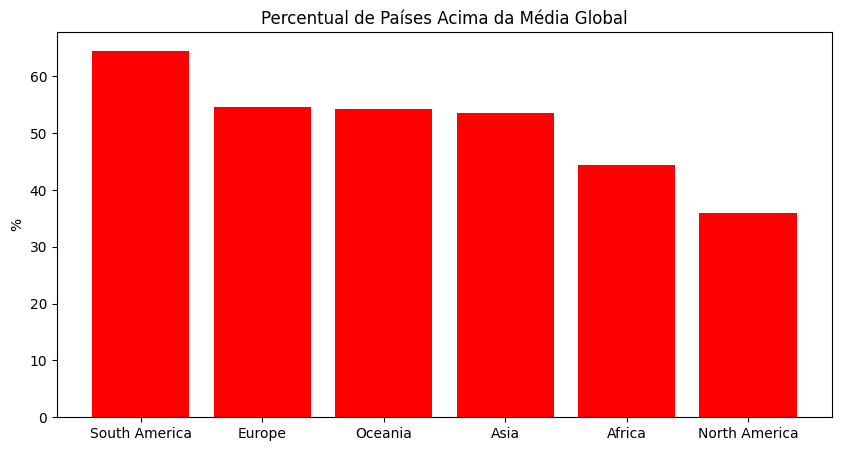

In [635]:
# 5. Plotando gráficos

plt.figure(figsize=(10,5))

plt.bar(
    numero_paises_acima_media['Continente'],
    numero_paises_acima_media['percentual_acima_media'],
    color='r'
)

plt.title('Percentual de Países Acima da Média Global')
plt.ylabel('%')

plt.show()